Vector of weights (w) =  [1.27555829 0.48420606]
b =  -4.803631600311204
Indices of support vectors =  [10 14 25]
Support vectors =  [[1.97857297 2.64265334]
 [1.51612475 3.862491  ]
 [3.07460128 3.88582571]]
Number of support vectors for each class =  [2 1]
Coefficients of the support vector in the decision function =  [[0.37913426 0.55183148 0.93096574]]
임의의 점: ( 2.51 , 3.84 )
예측결과: 1.0
초평면과의 거리: 2.7122570194515143


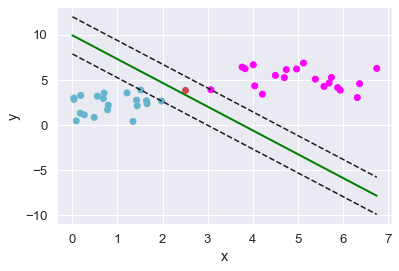

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 좌표값 생성해주는 함수, clf는 그룹
def make_two_clf(num, cnt):    
    df = pd.DataFrame(columns=['x','y','clf'])
    for i in range(cnt):
        x1 = np.random.uniform(0,num-1)
        y1 = np.random.uniform(0,num+1)
    
        x2 = np.random.uniform(num, num*2 + 1)
        y2 = np.random.uniform(num, num*2 + 1)
        
        df_temp = pd.DataFrame(np.c_[x1,y1,0],columns=['x','y','clf'])
        df = df.append(df_temp)
        
        df_temp = pd.DataFrame(np.c_[x2,y2,1],columns=['x','y','clf'])
        df = df.append(df_temp)
    return df
# 함수 실행
df = make_two_clf(3,20)

# 그룹별로 색 지정
color = []
for i in df['clf']:
    color.append("magenta" if i == 1 else "c")

from sklearn import svm
#---Converting the Columns as Matrices---
points = df[['x','y']].values
result = df['clf']
clf = svm.SVC(kernel = 'linear')
clf.fit(points, result)
print('Vector of weights (w) = ',clf.coef_[0])
print('b = ',clf.intercept_[0])
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ',
 np.abs(clf.dual_coef_))

#---w is the vector of weights---
w = clf.coef_[0]
#---find the slope of the hyperplane---
slope = -w[0] / w[1]
b = clf.intercept_[0]
#---find the coordinates for the hyperplane---
xx = np.linspace(0, max(df['x']))
yy = slope * xx - (b / w[1])
#---plot the margins---
s = clf.support_vectors_[0] #---first support vector---
yy_down = slope * xx + (s[1] - slope * s[0])
s = clf.support_vectors_[-1] #---last support vector---
yy_up = slope * xx + (s[1] - slope * s[0])
#---plot the points---
plt.scatter(df['x'],df['y'], c=color)

#---plot the hyperplane---
plt.plot(xx, yy, linewidth=2, color='green');
#---plot the 2 margins---
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# 임의의 점 생성
rx, ry = np.random.uniform(0,max(df['x'])), np.random.uniform(0,max(df['y']))
# 테스트
print('임의의 점: (',round(rx,2),',',round(ry,2),')')
print('예측결과:',clf.predict([[rx,ry]])[0])
print('초평면과의 거리:',w[0]*rx+w[1]+ry+b)
# 테스트용 점 플롯
plt.plot(rx, ry, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

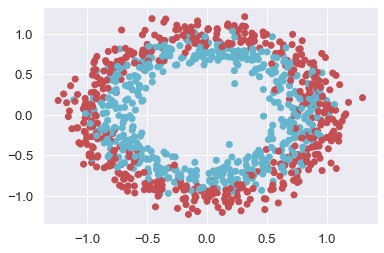

[[ 1.29942502  0.21103428]
 [ 0.49596376 -0.42860126]
 [ 0.40104823 -0.59844671]
 ...
 [-0.59760003 -0.51620813]
 [ 0.63089058 -0.63615299]
 [ 0.37777501 -0.75005434]]


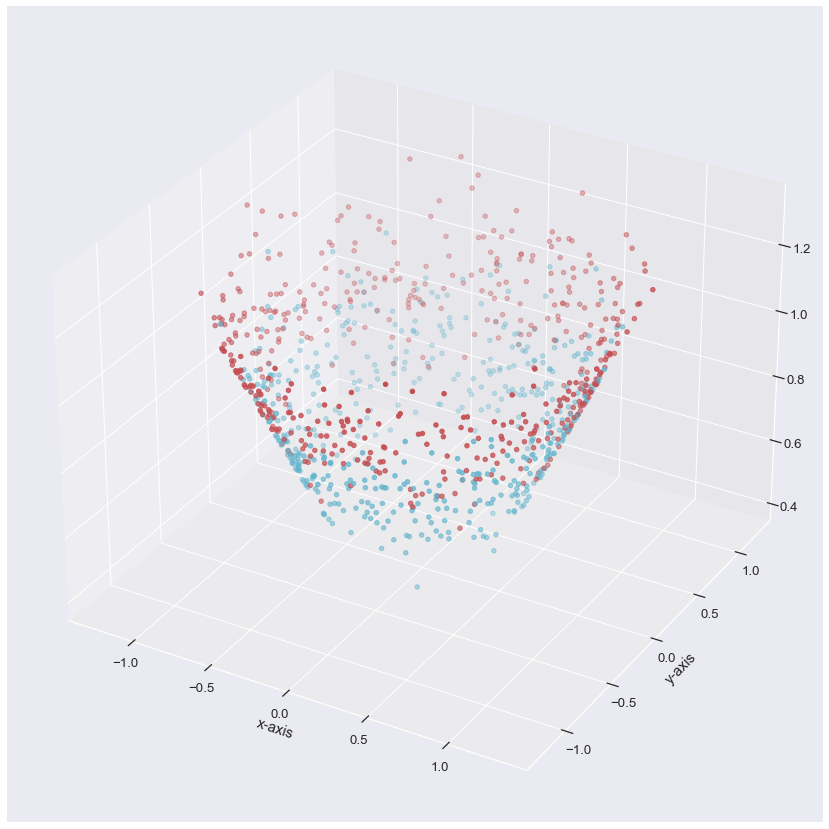

In [106]:
from sklearn.datasets import make_circles

# 원 형으로 데이터 생성
X, c = make_circles(n_samples=1000, noise=0.12)
rgb = np.array(['r', 'c'])
plt.scatter(X[:, 0], X[:, 1], color=rgb[c])
plt.show()
print(X)
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
z = np.sqrt(X[:,0]**2 + X[:,1]**2)
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

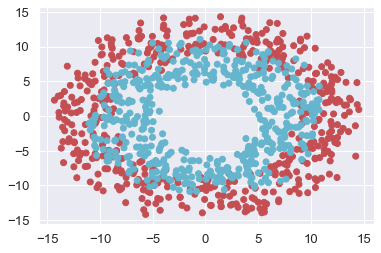

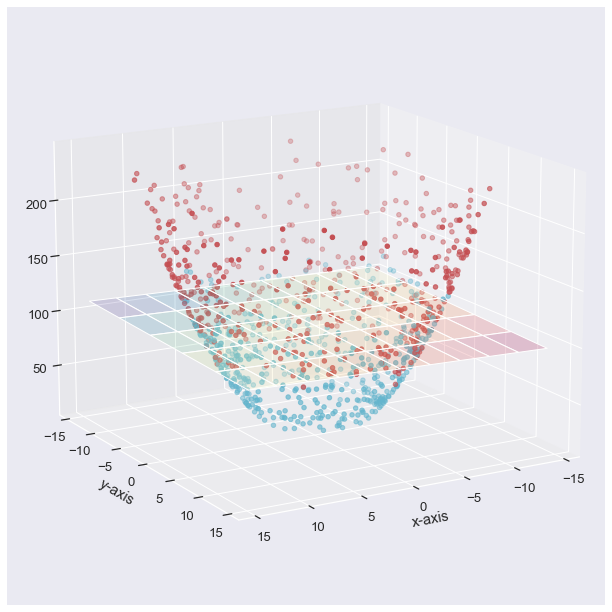

In [142]:
import numpy as np
import matplotlib.pyplot as plt

# num = 생성할 데이터 전체 개수
# radius = 생성할 원의 반지름
# noise = 랜덤 요소의 반지름 대비 비율
def make_circle(num, radius, noise):
    # 0도~ 360도 1도 단위로 등분 배열화
    setas = np.linspace(0,2*np.pi,num)
    setas1 = []
    setas2 = []
    for i in range(len(setas)):
        if i % 2 != 0:
            setas1.append(setas[i])
        else:
            setas2.append(setas[i])
    x = []
    y = []
    c = []
    colors=['r','c']
    # x,y좌표 생성
    for s in setas1:
        x.append(np.cos(s)*radius*1.19 + np.random.uniform(-0.5*noise*radius, 0.5*noise*radius))
        y.append(np.sin(s)*radius*1.19 + np.random.uniform(-0.5*noise*radius, 0.5*noise*radius))
        c.append(colors[0])
    for s in setas2:
        x.append(np.cos(s)*radius*.81 + np.random.uniform(-0.5*noise*radius, 0.5*noise*radius))
        y.append(np.sin(s)*radius*.81 + np.random.uniform(-0.5*noise*radius, 0.5*noise*radius))
        c.append(colors[1])
    return (np.c_[x,y],c)

# 생성할 좌표 개수, 생성할 원 반지름, 반지름 대비 노이즈 비율
X,c = make_circle(1000, 10, 0.6)
plt.scatter(X[:,0], X[:,1], c = c)
plt.show()

fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111, projection='3d')
z = X[:,0]**2 + X[:,1]**2
plt.xlabel("x-axis")
plt.ylabel("y-axis")
#---combine X (x-axis,y-axis) and z into single ndarray---
features = np.concatenate((X,z.reshape(-1,1)), axis=1)
#---use SVM for training---
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(features, c)
x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1]
 * y) / clf.coef_[0][2]
tmp = np.linspace(min(X[:,0]),max(X[:,0]),100)
x,y = np.meshgrid(tmp,tmp)
ax.plot_surface(x, y, x3(x,y), color = 'y', alpha = 0.2, rstride=20, cmap='Spectral')
ax.scatter(X[:, 0], X[:, 1], z, color=c)

ax.view_init(15, 60)
plt.show()